# BANK MARKETING - Predicting Whether The Customer Will Subscribe To Term Deposit -Sudhanshu Kumar Singh -DS2306 Date 10-10-2023

In [193]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

#Suppress warnings for better readability

import warnings
warnings.filterwarnings("ignore")

In [194]:
# Load the training and testing data
train_data=pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/termdeposit_train.csv")
test_data=pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/termdeposit_test.csv")


In [195]:
# Sample of training data
train_data.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
10730,18289,37,admin.,single,secondary,no,483,no,no,cellular,31,jul,11,11,-1,0,unknown,no


In [196]:
# Information about training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [197]:
# Drop unnecessary columns (e.g., ID)
train_data = train_data.drop('ID', axis=1)
test_data = test_data.drop('ID', axis=1)

In [198]:
# columns of train data
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [267]:
# Shape of training and testing data
print(train_data.shape)
print(test_data.shape)

(31647, 17)
(13564, 16)


In [201]:
#many columns are object so need to convert in ordinal form 
for feature in train_data.columns: 
    if train_data[feature].dtype == 'object': 
        train_data[feature] = pd.Categorical(train_data[feature])

In [202]:
#many columns are object so need to convert in ordinal form 
for feature in test_data.columns: 
    if test_data[feature].dtype == 'object': 
        test_data[feature] = pd.Categorical(test_data[feature])

In [203]:
#Columns of tesing data
test_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [204]:
# Again taking information about train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         31647 non-null  int64   
 1   job         31647 non-null  category
 2   marital     31647 non-null  category
 3   education   31647 non-null  category
 4   default     31647 non-null  category
 5   balance     31647 non-null  int64   
 6   housing     31647 non-null  category
 7   loan        31647 non-null  category
 8   contact     31647 non-null  category
 9   day         31647 non-null  int64   
 10  month       31647 non-null  category
 11  duration    31647 non-null  int64   
 12  campaign    31647 non-null  int64   
 13  pdays       31647 non-null  int64   
 14  previous    31647 non-null  int64   
 15  poutcome    31647 non-null  category
 16  subscribed  31647 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.0 MB


In [205]:
#Takeing information about testing data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        13564 non-null  int64   
 1   job        13564 non-null  category
 2   marital    13564 non-null  category
 3   education  13564 non-null  category
 4   default    13564 non-null  category
 5   balance    13564 non-null  int64   
 6   housing    13564 non-null  category
 7   loan       13564 non-null  category
 8   contact    13564 non-null  category
 9   day        13564 non-null  int64   
 10  month      13564 non-null  category
 11  duration   13564 non-null  int64   
 12  campaign   13564 non-null  int64   
 13  pdays      13564 non-null  int64   
 14  previous   13564 non-null  int64   
 15  poutcome   13564 non-null  category
dtypes: category(9), int64(7)
memory usage: 862.9 KB


In [206]:
print(train_data.job.value_counts())
print('\n',train_data.marital.value_counts())
print('\n',train_data.education.value_counts())
print('\n',train_data.default.value_counts())
print('\n',train_data.housing.value_counts())
print('\n',train_data.loan.value_counts())
print('\n',train_data.contact.value_counts())
print('\n',train_data.month.value_counts())
print('\n',train_data.poutcome.value_counts())
print('\n',train_data.subscribed.value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

 married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

 secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

 no     31062
yes      585
Name: default, dtype: int64

 yes    17584
no     14063
Name: housing, dtype: int64

 no     26516
yes     5131
Name: loan, dtype: int64

 cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

 may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

 unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int

In [207]:
replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "subscribed":    {"no": 0, "yes": 1} 
                    }

train_data=train_data.replace(replaceStruct)
train_data.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
2036,42,8,3,2,0,3780,1,0,1,19,11,104,3,-1,0,-1,0


In [208]:
test_data=test_data.replace(replaceStruct)
test_data.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
11162,34,4,2,3,0,0,0,0,1,28,1,155,2,-1,0,-1


In [209]:
columns_to_convert = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','subscribed']

In [210]:
from sklearn.preprocessing import LabelEncoder

In [211]:
label_encoder = LabelEncoder()
for col in columns_to_convert:
    train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))
    print(train_data.dtypes)


age              int64
job              int32
marital       category
education     category
default       category
balance          int64
housing       category
loan          category
contact       category
day              int64
month         category
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome      category
subscribed    category
dtype: object
age              int64
job              int32
marital          int32
education     category
default       category
balance          int64
housing       category
loan          category
contact       category
day              int64
month         category
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome      category
subscribed    category
dtype: object
age              int64
job              int32
marital          int32
education        int32
default       category
balance          int64
housing       category
loan          category
contac

In [212]:
test_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [213]:
coltest_to_convert = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [214]:
label_encoder = LabelEncoder()
for col in coltest_to_convert:
    test_data[col] = label_encoder.fit_transform(test_data[col].astype(str))
    print(test_data.dtypes)

age             int64
job             int32
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
dtype: object
age             int64
job             int32
marital         int32
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
dtype: object
age             int64
job             int32
marital         int32
education       int32
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
camp

In [215]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         31647 non-null  int64
 1   job         31647 non-null  int32
 2   marital     31647 non-null  int32
 3   education   31647 non-null  int32
 4   default     31647 non-null  int32
 5   balance     31647 non-null  int64
 6   housing     31647 non-null  int32
 7   loan        31647 non-null  int32
 8   contact     31647 non-null  int32
 9   day         31647 non-null  int64
 10  month       31647 non-null  int32
 11  duration    31647 non-null  int64
 12  campaign    31647 non-null  int64
 13  pdays       31647 non-null  int64
 14  previous    31647 non-null  int64
 15  poutcome    31647 non-null  int32
 16  subscribed  31647 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 2.9 MB


In [216]:
train_data.isnull().sum() 

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [217]:
train_data.isnull().values.any()

False

In [218]:
train_data.isna().any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
subscribed    False
dtype: bool

In [219]:
for value in train_data.columns:
     print(value,":", sum(train_data[value] == '?'))

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
subscribed : 0


In [220]:
train_data_transpose = train_data.describe().T
train_data_transpose

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
job,31647.0,4.690081,2.717993,0.0,2.0,5.0,6.0,11.0
marital,31647.0,0.832780,0.607186,0.0,0.0,1.0,1.0,2.0
education,31647.0,2.058931,0.780034,0.0,2.0,2.0,3.0,3.0
default,31647.0,0.018485,0.134700,0.0,0.0,0.0,0.0,1.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
housing,31647.0,0.555629,0.496904,0.0,0.0,1.0,1.0,1.0
loan,31647.0,0.162132,0.368578,0.0,0.0,0.0,0.0,1.0
contact,31647.0,0.774702,0.551283,0.0,0.0,1.0,1.0,2.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0


<AxesSubplot:>

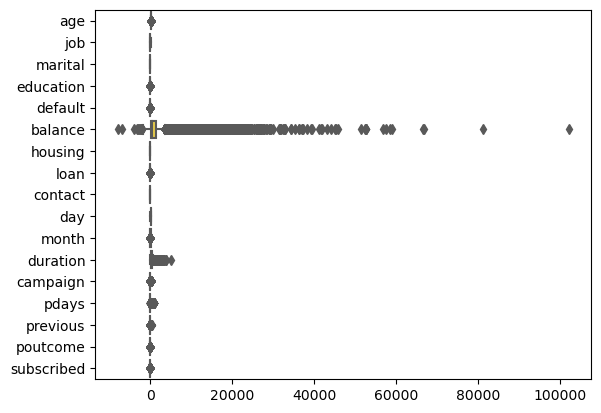

In [221]:
#Finding the outliers
sns.boxplot(data=train_data, orient="h", palette="Set2", dodge=False)

<AxesSubplot:>

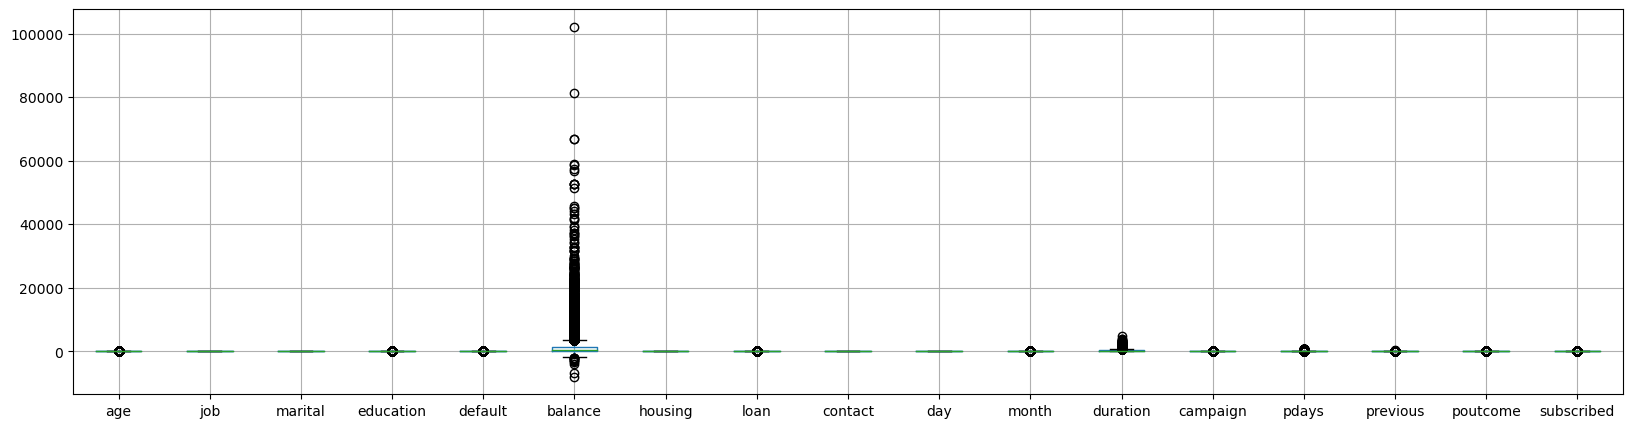

In [222]:
train_data.boxplot(return_type='axes', figsize=(20,5))

In [223]:
Q1=train_data['balance'].quantile(0.25) #quantile(0.25) is quantile1
Q3=train_data['balance'].quantile(0.75) #quantile(0.75) is quantile3
IQR=Q3-Q1
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', train_data[train_data['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', train_data[train_data['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1358.0
Numerber of outliers in balance column below the lower whisker : 12
Numerber of outliers above balance column the uper whisker  : 3287


In [224]:
for i in train_data.describe().columns:
    Q1=train_data.describe().at['25%',i]
    Q3=train_data.describe().at['75%',i]
    IQR=Q3-Q1
    LB=Q1-1.5*IQR #lower bound 
    UB=Q3+1.5*IQR #upper bound
    print('Column Name                                           :',i)
    print('Interquartile range IQR                              :',IQR)
    print('Number of outliers below the lower whisker        	:', train_data[train_data[i] < LB][i].count())
    print('Number of outliers above the upper whisker     :', train_data[train_data[i] > UB][i].count())
    print('Total Numbers of Outliers                        :', (train_data[train_data[i] < LB][i].count()) + (train_data[train_data[i] > UB][i].count()))
    
    print('\n')

Column Name                                           : age
Interquartile range IQR                              : 15.0
Number of outliers below the lower whisker        	: 0
Number of outliers above the upper whisker     : 349
Total Numbers of Outliers                        : 349


Column Name                                           : job
Interquartile range IQR                              : 4.0
Number of outliers below the lower whisker        	: 0
Number of outliers above the upper whisker     : 0
Total Numbers of Outliers                        : 0


Column Name                                           : marital
Interquartile range IQR                              : 1.0
Number of outliers below the lower whisker        	: 0
Number of outliers above the upper whisker     : 0
Total Numbers of Outliers                        : 0


Column Name                                           : education
Interquartile range IQR                              : 1.0
Number of outliers below t

# Data Visualation 

In [252]:
col_plot= ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome','subscribed']
subset_train_data = train_data[col_plot]


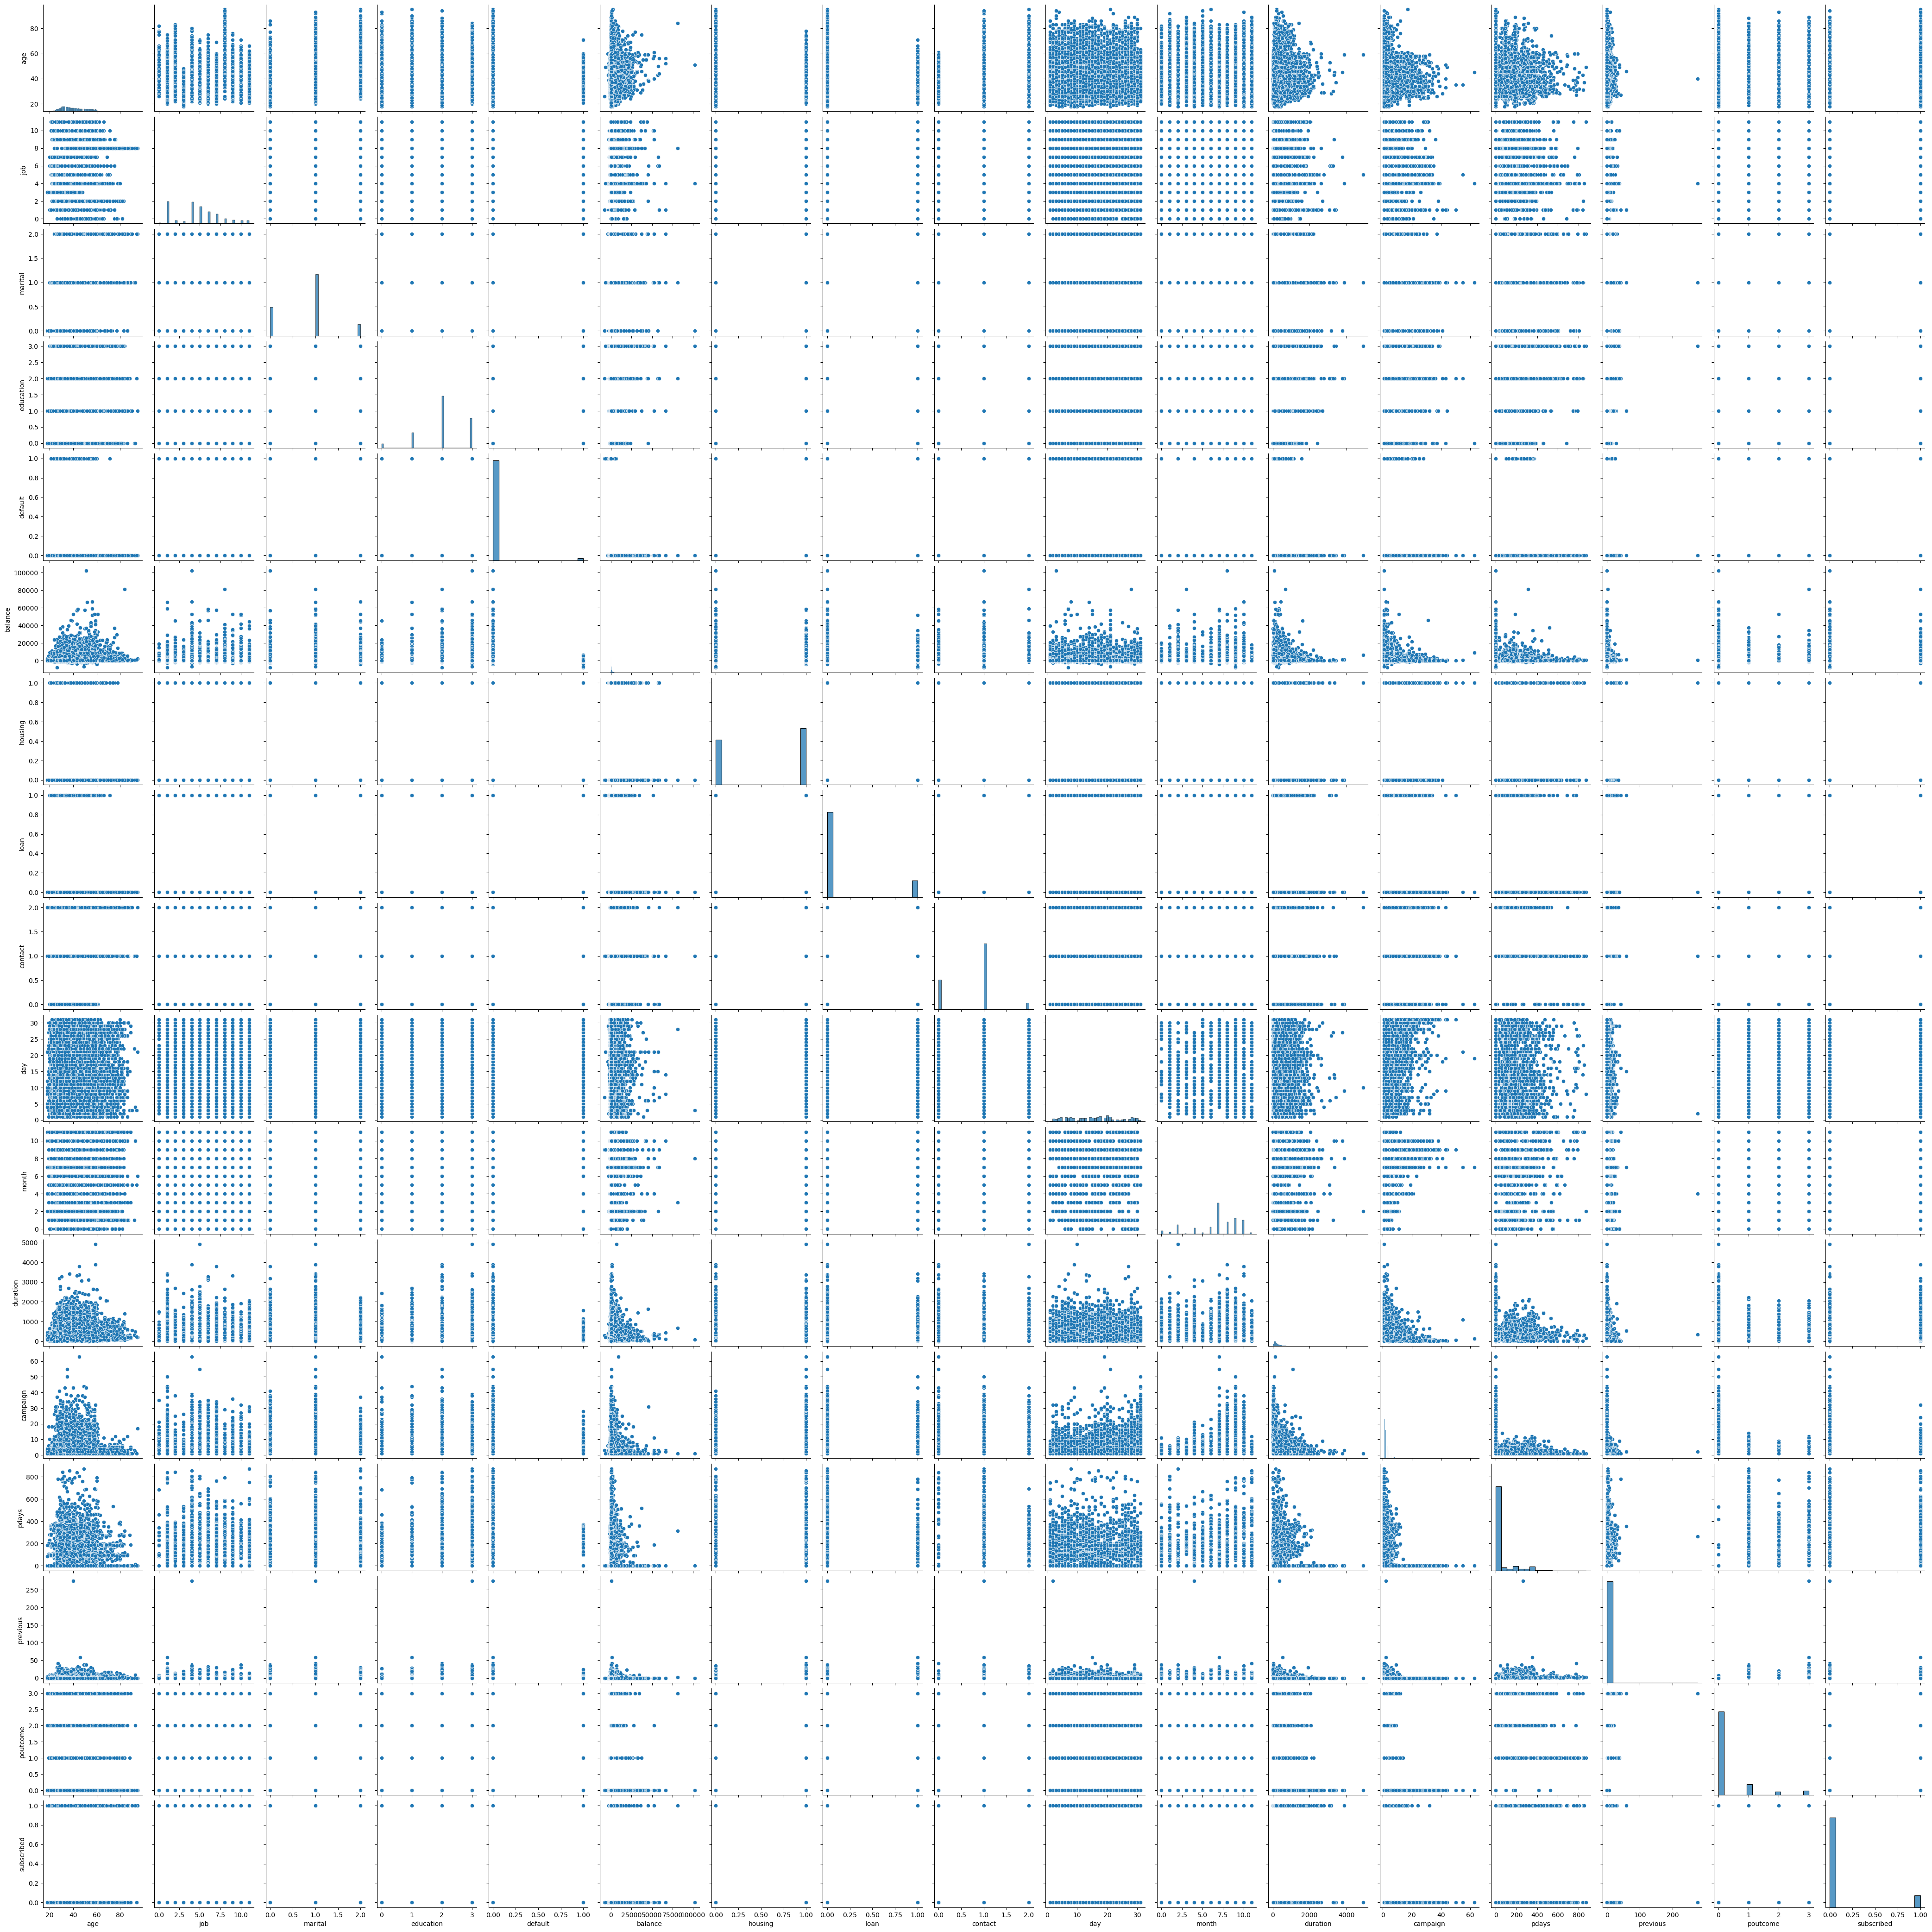

In [251]:
sns.pairplot(subset_train_data)
plt.show()

In [227]:
# Visualize the ratio of subscriber and non subscrbiper 
subscriber = pd.DataFrame(train_data["subscribed"].value_counts()).reset_index()
subscriber.columns =["Labels","Subscrbied"]
subscriber

,Labels,Subscrbied
0,0,27932
1,1,3715


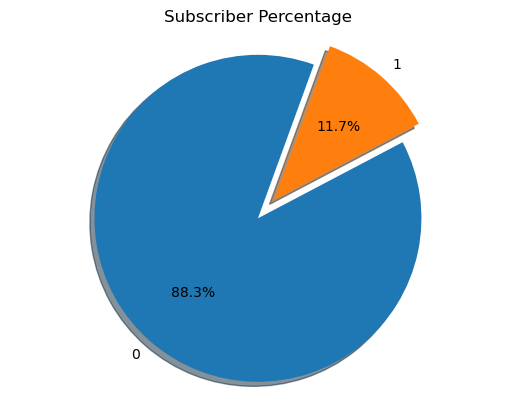

In [228]:
# 0 is indicating No and 1 is indicating yes.Means number of Not subscbited is more i.e 27932 and subscribed =3715.Visualing it with the help of pie chart 
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber["Subscrbied"], explode=explode, labels=subscriber["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

In [229]:
# 83% are not subscrbied and 11.7 % are subscbried . We can say that most cleints are not subcringing.

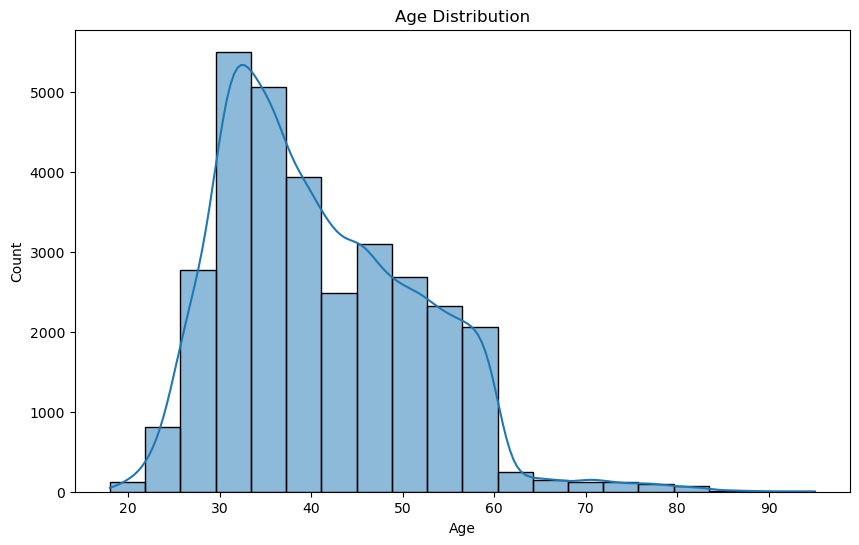

In [254]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


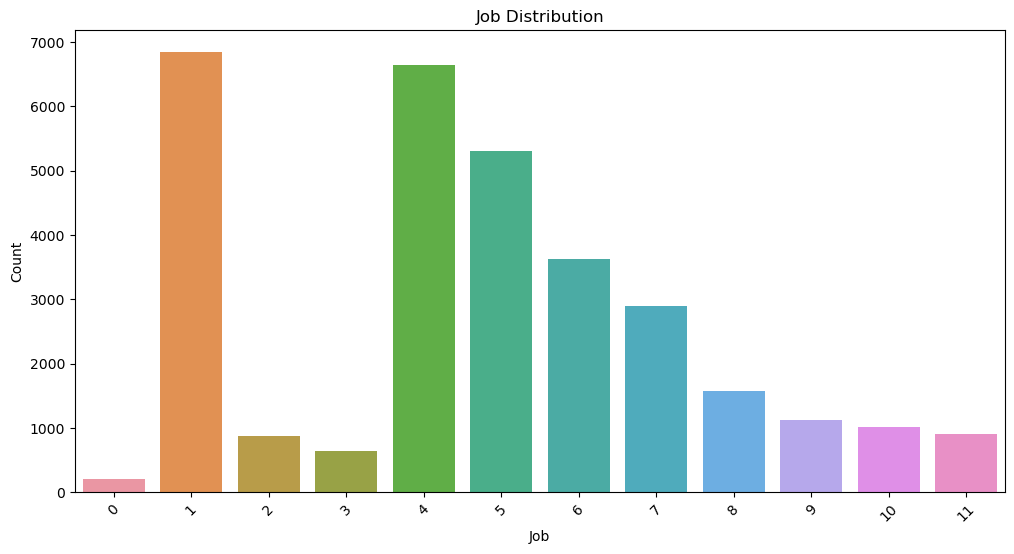

In [255]:
# Job distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=train_data)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

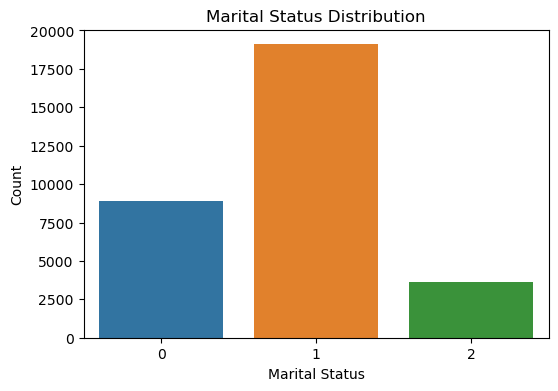

In [256]:
# Marital status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', data=train_data)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

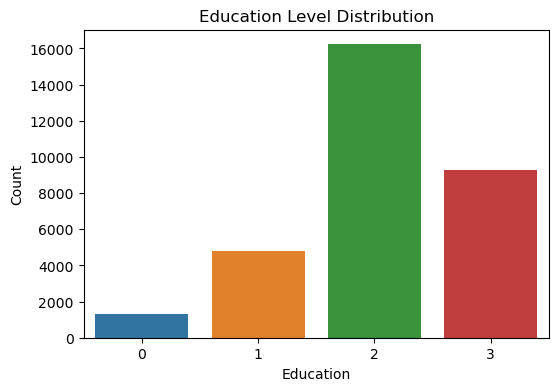

In [257]:
# Education level distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=train_data)
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

<AxesSubplot:title={'center':'Correlation of Attributes'}>

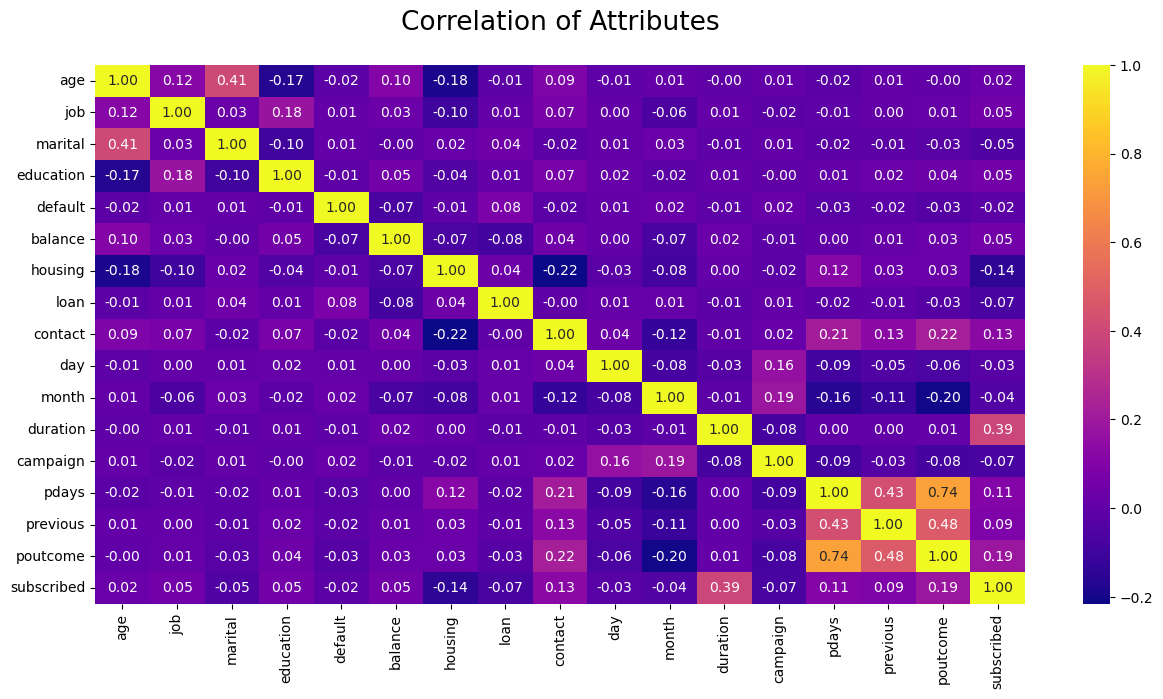

In [231]:
#correlation heat map
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(train_data.corr(), cmap='plasma',annot=True, fmt='.2f')

# Model Creation 

In [232]:
y = train_data['subscribed']
X = train_data.drop('subscribed', axis=1)

In [233]:
X_test=test_data

In [234]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,6,1,0,0,1933,0,0,2,19,2,44,2,-1,0,0
1,31,0,1,2,0,3,0,0,1,20,9,91,2,-1,0,0
2,27,7,1,2,0,891,1,0,1,18,9,240,1,-1,0,0
3,57,4,2,3,0,3287,0,0,1,22,8,867,1,84,3,2
4,31,5,1,2,0,119,1,0,1,4,4,380,1,-1,0,0


In [235]:
#Splited the data into train and test and kept 20% for testing pourpose and rest for training purposes 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)

# Logistic Regression

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
#Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [238]:
#Predict on the test set
y_pred = model.predict(X_test)

In [239]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8862559241706162
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      5608
           1       0.50      0.16      0.24       722

    accuracy                           0.89      6330
   macro avg       0.70      0.57      0.59      6330
weighted avg       0.86      0.89      0.86      6330



# Decission Tree classifier 

In [240]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [241]:
# Initializing and tain the decission tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [242]:
#predict on the test set
y_pred = tree_model.predict(X_test)

In [243]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8725118483412322


In [244]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      5608
           1       0.45      0.48      0.46       722

    accuracy                           0.87      6330
   macro avg       0.69      0.70      0.70      6330
weighted avg       0.88      0.87      0.87      6330



# Support Vector Classifier (SVC)

In [245]:
from sklearn.svm import SVC

In [246]:
# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [247]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [248]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.885781990521327


In [249]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      5608
           1       0.47      0.01      0.02       722

    accuracy                           0.89      6330
   macro avg       0.68      0.50      0.48      6330
weighted avg       0.84      0.89      0.83      6330

